In [45]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(ga_instance, solution, sol_idx):
    # (Menggnakan data X_train dan y_train)
    global X_train, y_train, keras_ga, model

    predictions = pygad.kerasga.predict(model=model,
                                        solution=solution,
                                        data=X_train)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00000001
    solution_fitness = 1.0/abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

In [40]:
# data_all = numpy.array([[0.02, 0.1, 0.15, 0.1],
#                         [0.7, 0.6, 0.8, 0.6],
#                         [1.5, 1.2, 1.7, 1.3],
#                         [3.2, 2.9, 3.1, 2.5]])

# def to_sequences(data, seq_len):
#     d = []
#     for index in range(len(data) - seq_len):
#         d.append(data[index: index + seq_len])
#     return numpy.array(d)

# def preprocess(data_raw, seq_len, train_split):
#     data = to_sequences(data_raw, seq_len)
#     # num_train = int(train_split * data.shape[0])
#     X_train = data[:, :-1, :]
#     y_train = data[:, -1, :]
#     # X_test = data[num_train:, :-1, :]
#     # y_test = data[num_train:, -1, :]
#     return X_train, y_train

# data_all = data_all.reshape(-1, 1)
# X_train, y_train = preprocess(data_all, 4, train_split = 0.90)

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Google Spreadsheet ID
SHEET_ID = '1JDNv_mArl-GPIpxuWS5GxgVEwvjXocS1MrXGc6TYs8M'
SHEET_NAME = 'USD/IDR'

url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
df = pd.read_csv(url, parse_dates=['Date'])
df.drop('Unnamed: 2', axis=1, inplace=True)
df = df.sort_values('Date')

scaler = StandardScaler()
close_price = df.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return numpy.array(d)

def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.90)

In [51]:
WINDOW_SIZE = SEQ_LEN - 1

model = tensorflow.keras.Sequential([
    # tensorflow.keras.layers.Input(shape=(3,)),
    # tensorflow.keras.layers.Reshape((3,1)),
    tensorflow.keras.layers.LSTM(WINDOW_SIZE, input_shape=(WINDOW_SIZE, X_train.shape[-1])),
    tensorflow.keras.layers.Dense(1, activation="linear"),
])

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

2023-05-29 16:26:13.861116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-29 16:26:13.862518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-29 16:26:13.863686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 100 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = keras_ga.population_weights # Initial population of network weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

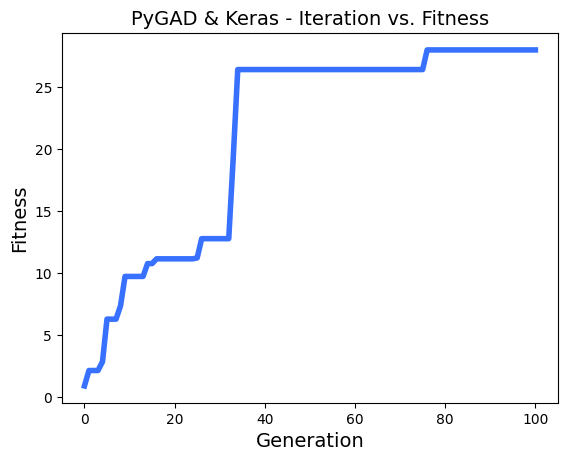

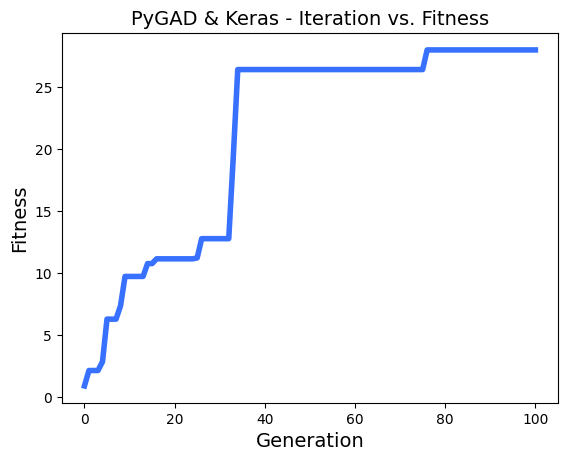

In [4]:
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [5]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

1/1 [==============================] - 0s 35ms/step
Fitness value of the best solution = 27.986927206168108
Index of the best solution : 0


In [6]:
# Make prediction based on the best solution. (Menggnakan data X_test dan y_test)
predictions = pygad.kerasga.predict(model=model,
                                    solution=solution,
                                    data=data_inputs)
print("Predictions : \n", predictions)

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)

1/1 [==============================] - 0s 43ms/step
Predictions : 
 [[0.09787814]
 [0.63231796]
 [1.1946781 ]
 [2.4968379 ]]
Absolute Error :  0.035730958
